# **Pseudo-random numbers**

**Assignment 1**: Complete the code below to generate a pseudorandom sequence based on the value of $\pi$

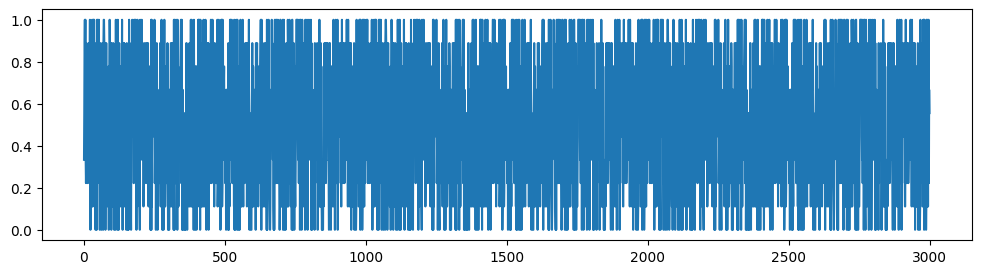

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Store the first 1000 digits of pi
pi = ("14159265358979323846264338327950288419716939937510"
    "58209749445923078164062862089986280348253421170679"
    "82148086513282306647093844609550582231725359408128"
    "48111745028410270193852110555964462294895493038196"
    "44288109756659334461284756482337867831652712019091"
    "45648566923460348610454326648213393607260249141273"
    "72458700660631558817488152092096282925409171536436"
    "78925903600113305305488204665213841469519415116094"
    "33057270365759591953092186117381932611793105118548"
    "07446237996274956735188575272489122793818301194912"
    "98336733624406566430860213949463952247371907021798"
    "60943702770539217176293176752384674818467669405132"
    "00056812714526356082778577134275778960917363717872"
    "14684409012249534301465495853710507922796892589235"
    "42019956112129021960864034418159813629774771309960"
    "51870721134999999837297804995105973173281609631859"
    "50244594553469083026425223082533446850352619311881"
    "71010003137838752886587533208381420617177669147303"
    "59825349042875546873115956286388235378759375195778"
    "18577805321712268066130019278766111959092164201989")

def randomGenerator(size=100, seed=0):
    """
    Input:
        size: length of the random sequence
        seed: seed for the sequence
    Output:
        seq: list with the random sequence
    """
    seq = []
    for i in range(size):
        ## WRITE YOUR CODE HERE
        seq.append(int(pi[seed]))
        seed = (seed+1) % 1000
        #----------------------
    return seq

seq = randomGenerator(3000, 8)
plt.figure(figsize=(12,3))
p = plt.plot(np.array(seq)/9)

**Assigment 2**: Complete the code below to count the number of times that appears each value.

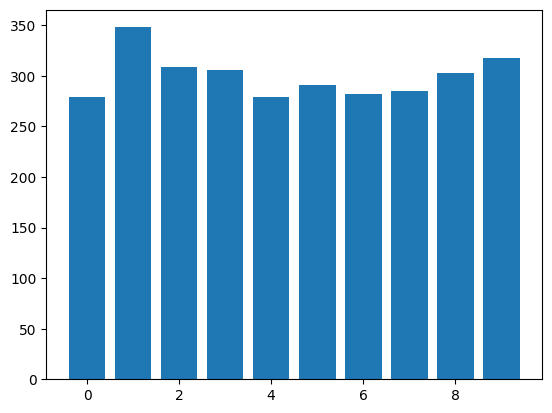

In [17]:
def freqCount(seq):
    """
    Input: random sequence (seq)
    Output: frequency count (freq)
    """
    freq = [0 for i in range(max(seq) + 1)]
    for i in seq:
        ## WRITE YOUR CODE HERE
        freq[i] += 1
        #----------------------
    return freq

freq = freqCount(seq)
p = plt.bar(range(max(seq) + 1), freq)

In [18]:
import datetime as dt

int(str(dt.datetime.now().microsecond)[:3])

475

## Moving Average

2801


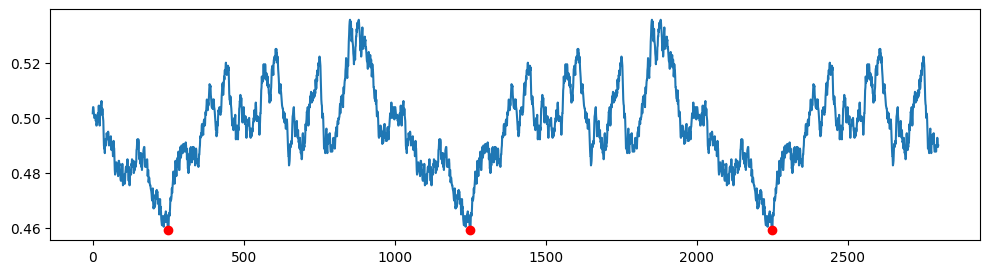

In [19]:
from scipy.ndimage import uniform_filter1d

arr = np.array(seq.copy())/9
window_size = 200
moving_averages = []

i = 0
while i < len(arr) - window_size + 1:
    window = arr[i : i + window_size]
    window_average = sum(window)/window_size
    moving_averages.append(window_average)
    i += 1

print(len(moving_averages))
plt.figure(figsize=(12,3))
plt.plot(moving_averages)
moving_averages = np.array(moving_averages)
minimum = np.where(moving_averages == moving_averages.min())[0]
p = plt.plot(minimum, moving_averages[minimum], 'or')

3000


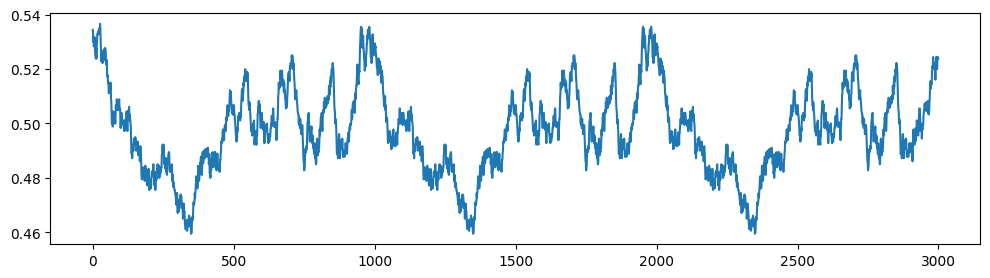

In [20]:
avg_data = uniform_filter1d(arr, size=200)
print(len(avg_data))

plt.figure(figsize=(12,3))
p = plt.plot(avg_data)

## Linear congruential generator

 Implement a linear congruential generator ([LCG](https://en.wikipedia.org/wiki/Linear_congruential_generator))

$X_n = (a \cdot X_{n-1} + c) \text{ mod } m$

  - $a$: multiplier
  - $c$: increment
  - $m$: modulus
  - $X_0$: seed

LCG Theorem:

1. $m$ and $c$ are relatively prime
2. $a-1$ is divisible by every prime factor of $m$
3. If $m$ is a multiple of 4, then $a-1$ is a multiple of $4$

**Assignment 3**: Complete the code below to implement LCG.

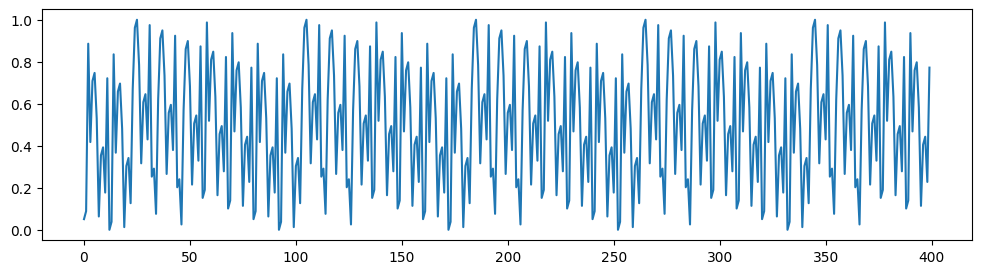

In [21]:
def lcg(seed=0, increment=1, multiplier=31, modulus=256, size=100):
    seq = [seed]
    for i in range(size-1):
        ## WRITE YOUR CODE HERE
        seq.append(((multiplier*seq[-1])+increment) % modulus)
        ## --------------------
    return seq

m = 80  # this will give us the cycle size in above conditions are met
c = 3
a = 21
X0 = 4
seq = lcg(seed=X0, increment=c, multiplier=a, modulus=m, size=400)
plt.figure(figsize=(12,3))
p = plt.plot(np.array(seq)/(m-1))

**Assigment 4**: Write a code to count the number of times that appears each value and plot the corresponding histogram.

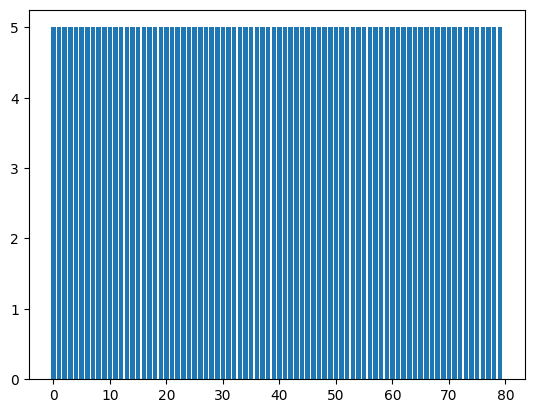

In [22]:
## WRITE YOUR CODE HERE
def logic(lcg):
    freq = [0 for i in range(max(seq) + 1)]
    for i in seq:
        ## WRITE YOUR CODE HERE
        freq[i] += 1
        #----------------------
    return freq

freq = freqCount(seq)
p = plt.bar(range(max(seq) + 1), freq)
## --------------------

**Assignment 5**: Generate a sequence with the useful values given below.

$X_n = (a \cdot X_{n-1} + c) \text{ mod } m$

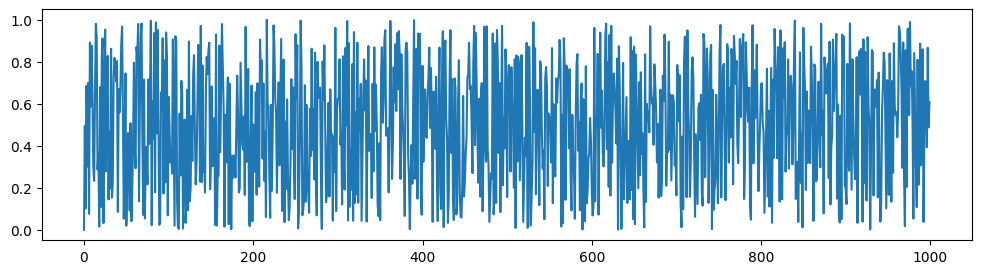

In [23]:
m = 2**32
a = 1103515245
c = 12345
X0 = dt.datetime.now().microsecond
size = 1000
## WRITE YOUR CODE HERE
X = lcg(multiplier=a, seed=X0, increment=c, modulus=m, size=size)
## --------------------
plt.figure(figsize=(12,3))
p = plt.plot(np.array(X)/(m-1))

**Assignment 6**: Calculate the moving average of the last sequence and visually determine if there is any repeated pattern.

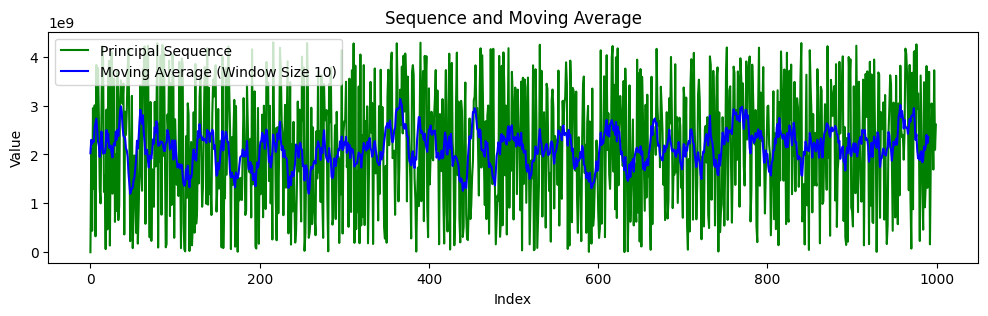

In [32]:
## WRITE YOUR CODE HERE
seq = lcg(seed=X0, increment=c, multiplier=a, modulus=m, size=size)

def moving_average(seq, window_size):
    moving_averages = []
    i = 0
    while i < len(seq) - window_size + 1:
        window = seq[i : i + window_size]
        window_average = sum(window)/window_size
        moving_averages.append(window_average)
        i += 1
    return moving_averages

window_size = 10
moving_avg = moving_average(seq, window_size)

# Plot the original sequence and the moving average
plt.figure(figsize=(12, 3))
plt.plot(seq, label='Principal Sequence', color='Green')
plt.plot(moving_avg, label=f'Moving Average (Window Size {window_size})', color='Blue')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Sequence and Moving Average')
plt.legend()
plt.show()
## --------------------

## Overlapping Pairs

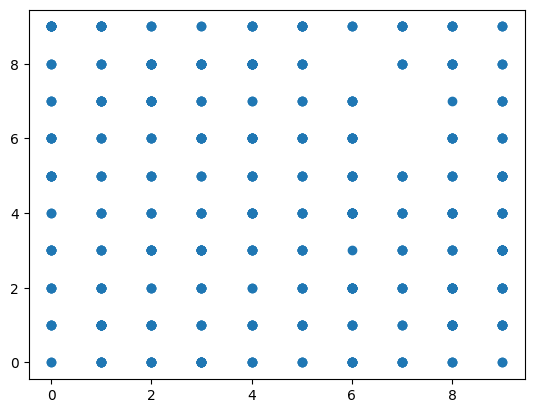

In [25]:
def pairs(seq):
    """
    Returns Xi, Xi+1 point coordinates from sequence seq
    """
    N = len(seq)
    x_coord, y_coord = [], []
    for i in range(N - 1):
        x_coord += [seq[i]]
        y_coord += [seq[i+1]]
    return x_coord, y_coord

seq = randomGenerator(512, 8)
x, y = pairs(seq)
plt.plot(x, y, 'o')
plt.show()

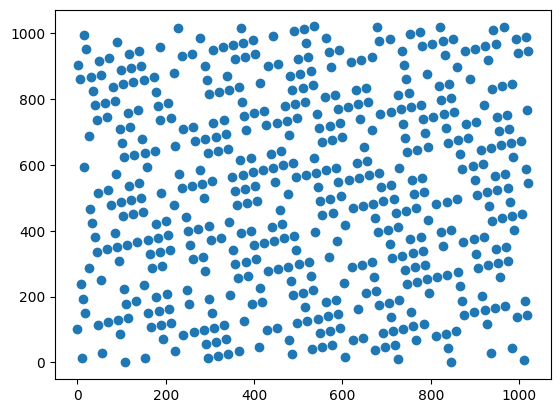

In [26]:
seq = lcg(seed=7, increment=101, multiplier=401, modulus=1024, size=512)
x, y = pairs(seq)
plt.plot(x, y, 'o')
plt.show()

**Assignment 7**: What conclusion could you draw from the two previous overlapping pair plots?

Comparing the two graphs, I see that the second graph is safer, because the probability of having similarities is lower

## Probability Computation

**Assignment 8**: Determine the probability of getting 5 heads out of 10 coin tosses.

In [27]:
## WRITE YOUR CODE HERE

#0 = head
#1 = tail
import random

def factorial(n):
    if n == 0:
        return 1
    resultado = 1
    for i in range(1, n + 1):
        resultado *= i
    return resultado

def GetCoin(trys, gets):
    probability = 0.5  # Probabilidad de cara en un solo tiro
    nk = factorial(trys)/(factorial(gets)*(factorial(trys-gets)))  # Coeficiente binomial
    probabilidad = nk * (probability ** gets) * ((1 - probability) ** (trys - gets))
    return probabilidad
            
print(GetCoin(trys=10, gets=5))
## --------------------

0.24609375


**Assignment 9**: Determine the probability of getting 50 heads out of 100 coin tosses.  Same probability or not?

In [28]:
## WRITE YOUR CODE HERE
print (GetCoin(trys=100, gets=50))
## --------------------

0.07958923738717877


## Birthday Problem

Implement the birhtday problem: https://en.wikipedia.org/wiki/Birthday_problem

**Assignment 10**: Plot the probability that in a set of $n$ randomly chosen people, at leat two will share a birthday.  Vary $n$ between 0 and 100.

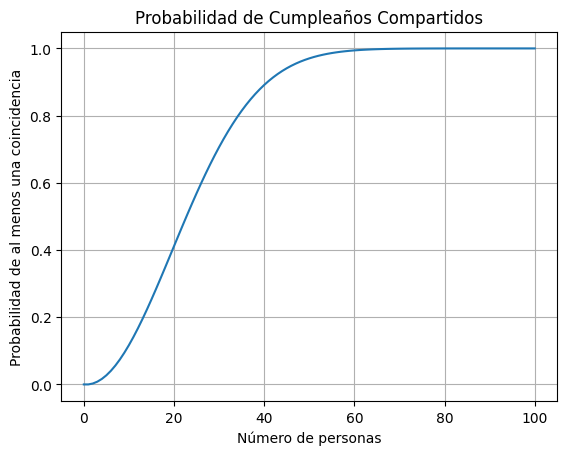

In [29]:
## WRITE YOUR CODE HERE
def birthday_probability(n):
    if n < 2:
        return 0.0

    prob_no_shared_birthday = 1.0
    for i in range(n):
        prob_no_shared_birthday *= (365 - i) / 365

    prob_shared_birthday = 1 - prob_no_shared_birthday
    return prob_shared_birthday

n_values = list(range(101))
probability_values = [birthday_probability(n) for n in n_values]

plt.plot(n_values, probability_values)
plt.xlabel('Número de personas')
plt.ylabel('Probabilidad de al menos una coincidencia')
plt.title('Probabilidad de Cumpleaños Compartidos')
plt.grid(True)
plt.show()
## --------------------